In [1]:
%pylab inline
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Perfect sensor
def sense(x):
    return x

In [3]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

In [4]:
def control(t, y, k):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = change_speed(k, 2, y[0])
    uy = change_speed(k, 10, y[1])
    return array([ux, uy])

In [5]:
def change_speed(k, target, current):
    weight = k*(target-current)
    return weight

In [6]:
tf = 30.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

#k value
k = 1

# Initial conditions
x = array([4., 5.])
x_log = [copy(x)]

# target postion
target = array([2.,10.])

# different from target
x_dif_log = [array([0,4])]
y_dif_log = [array([0,5])]

for t in time:
    y = sense(x)
    u = control(t, y, k)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    x_dif_log.append([t,y[0]])
    y_dif_log.append([t,y[1]])
    
x_log = array(x_log)
x_dif_log = array(x_dif_log)
y_dif_log = array(y_dif_log)

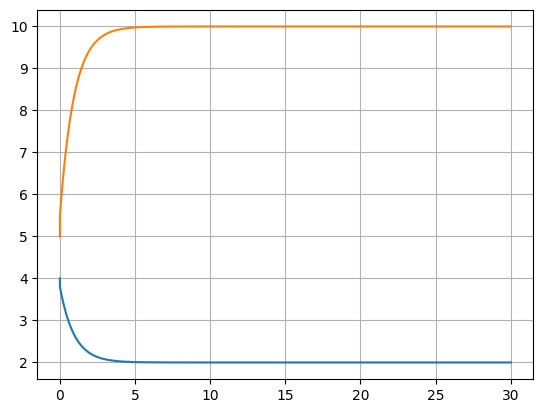

In [7]:
grid()
# plot(x_log[:,0], x_log[:,1])

plot(x_dif_log[:,0], x_dif_log[:,1], label='x(t)')
plot(y_dif_log[:,0], y_dif_log[:,1])
# print(x_dif_log)

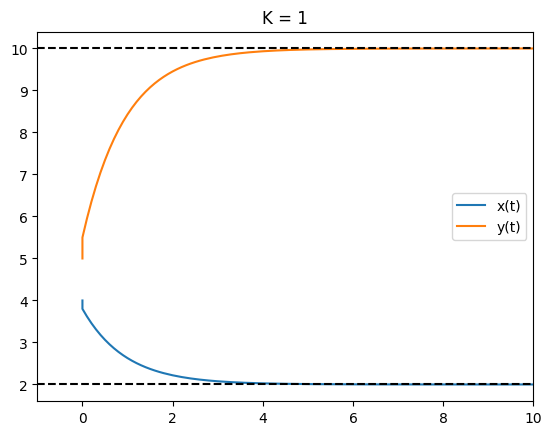

In [8]:
title = 'K = ' + str(k)
plt.title(title)
plt.plot(x_dif_log[:,0], x_dif_log[:,1], label='x(t)')
plt.plot(y_dif_log[:,0], y_dif_log[:,1],label='y(t)')
plt.axhline(2, linestyle='--',color = 'black' )
plt.axhline(10, linestyle='--',color = 'black' )
plt.xlim(-1, 10)
plt.legend()